# Visualization 1

- Advanced visualization, example: https://trailsofwind.figures.cc/
- Custom visualization steps:
    - (what) draw "patches" (shapes) on the screen:
        - lines
        - polygons
        - circle
        - text
    - (where) location of the "patches" on the screen:
        - X & Y coordinate
        - Coordinate Reference System (CRS):
            - takes some X & Y and maps it on to actual space on screen
            - several CRS

In [1]:
# import statements
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import math

### Review: drawing a figure

- `fig, ax = plt.subplots(figsize=(<width>, <height>))`

### Drawing a circle

- Type `plt.` and then tab to see a list of `patches`.
- `plt.Circle((<x>, <y>), <radius>)`
- To see the cicle, we need to invoke either:
    - `ax.add_patch(<circle object>)`
    - `ax.add_artist(<circle object>)`
    - this invocation needs to be in the same cell as the one that draws the figure
    - Is there a difference between `ax.add_patch` and `ax.add_artist`?
        - `ax.autoscale_view()`: automatically chose limits for the axes; typically works better with `ax.add_patch(...)`

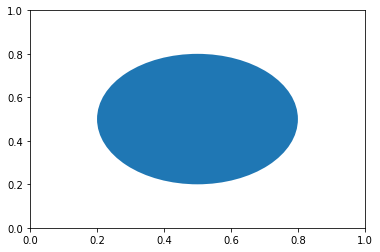

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))
# Let's draw a circle at (0.5, 0.5) of radius 0.3
c = plt.Circle((0.5, 0.5), 0.3)
# Add the circle to the AxesSubplot
ax.add_artist(c)

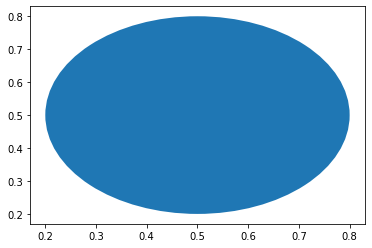

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
# Let's draw a circle at (0.5, 0.5) of radius 0.3
c = plt.Circle((0.5, 0.5), 0.3)
# Add the circle to the AxesSubplot
ax.add_patch(c)
ax.autoscale_view()

Type and MRO of circle object.

In [4]:
type(c)

matplotlib.patches.Circle

In [5]:
type(c).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

### Making the circle circular

1. Have same figure width and height
2. Aspect ratio
3. Transformers: let's us pick a Coordinate Reference System (CRS)

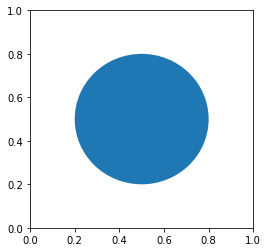

In [6]:
# Option 1: Have same figure width and height
fig, ax = plt.subplots(figsize=(4, 4))
c = plt.Circle((0.5, 0.5), 0.3)
ax.add_artist(c)

### Aspect Ratio

- `ax.set_aspect(<ratio>)`: how much space y axes takes with respect to x axes space

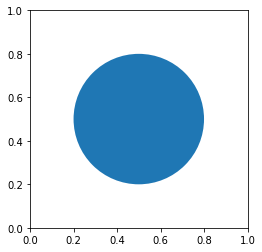

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
c = plt.Circle((0.5, 0.5), 0.3)
ax.add_artist(c)
# Set aspect for y-axis to 1
ax.set_aspect(1)

What if we want x and y axes to have the same aspect ratio? That is we care more about the figure being square than about the circle being circular.

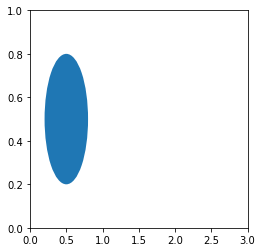

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
# Set x axis limit to (0, 3)
ax.set_xlim(0, 3)
c = plt.Circle((0.5, 0.5), 0.3)
ax.add_artist(c)
# Set aspect for y-axis to 3
ax.set_aspect(3)

### Transformers: let us pick a Coordinate Reference System (CRS)

- Documentation: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
- `ax.transData`: default
- `ax.transAxes`
- `fig.transFigure`
- `None` or `IdentityTransform()`: disabling CRS

### Review:
- `fig, ax = plt.subplots(figsize=(<width>, <height>), ncols=<N>, nrows=<N>)`:
    - ncols: split into vertical sub plots
    - nrows: split into horizontal sub plots
- `ax.set_xlim(<lower limit>, <upper limit>)`: set x-axis limits
- `ax.set_ylim(<lower limit>, <upper limit>)`: set y-axis limits

### Patch parameters:
- `transform` parameter in "patch" creation function let's us specify the CRS
- `color` parameter controls the color of the "patch"
- `edgecolor` parameter controls outer border color of the "patch"
- `linewidth` parameter controls the size of the border of the "patch"
- `facecolor` parameter controls the filled in color of the "patch"

### `ax.transData`
- plot patches based on their relative positions against the min and max values of the axes

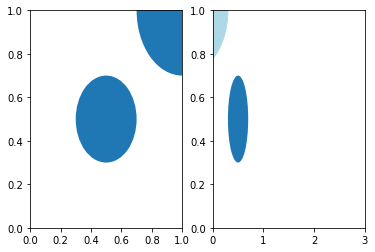

In [9]:
# Create a plot with two vertical subplots
fig, (ax1, ax2) = plt.subplots(figsize=(6, 4), ncols=2)
# Set right subplot x-axis limit from 0 to 3
ax2.set_xlim(0, 3)

# Left subplot: plot Circle at (0.5, 0.5) with radius 0.2
# Specify CRS as ax1.transData (tranform parameter)
c = plt.Circle((0.5, 0.5), 0.2, transform=ax1.transData)
ax1.add_artist(c)

# Right subplot: plot Circle at (0.5, 0.5) with radius 0.2
# default: transform=ax2.transData
c = plt.Circle((0.5, 0.5), 0.2) 
ax2.add_artist(c)
# Observe that we get a different circle

# Transform based on ax1, but crop based on ax2
# Left subplot: plot Circle at (1, 1) with radius 0.3 and crop using ax2
c = plt.Circle((1, 1), 0.3, transform=ax1.transData, color="lightblue") # where to position the shape 
ax2.add_artist(c)  # how to crop the shape

# Right subplot: plot Circle at (1, 1) with radius 0.3 and crop using ax1
c = plt.Circle((1, 1), 0.3, transform=ax1.transData) # where to position the shape
ax1.add_artist(c)  # how to crop the shape

### `ax.transAxes` and `fig.transFigure`

- (0, 0) is bottom left
- (1, 1) is top right
    - these are true immaterial of the axes limits
- Think of the positions as percentage of the entire plot

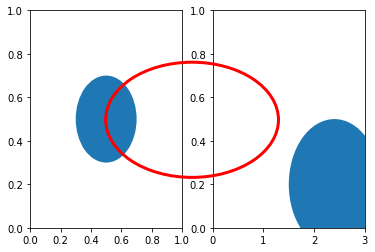

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(6, 4), ncols=2)
ax2.set_xlim(0, 3)

# Left subplot
c = plt.Circle((0.5, 0.5), 0.2, transform=ax1.transAxes)
ax1.add_artist(c)

# Right subplot
c = plt.Circle((0.8, 0.2), 0.3, transform=ax2.transAxes)
ax2.add_artist(c)

# whole figure
# edgecolor="red", facecolor="none", linewidth=3
c = plt.Circle((0.5, 0.5), 0.2, transform=fig.transFigure, edgecolor="red", facecolor="none", linewidth=3)
fig.add_artist(c)

### No CRS (raw pixel coordinates)

- `fig.dpi`: dots (aka pixels) per inch
- increasing dpi makes the figure have higher resolution (helpful when you want to print a large size)
- Review: 
    - `plt.tight_layout()`: avoid unncessary cropping of the figure --- always needed for No CRS cases
    - `fig.savefig(<relative path.png>)`: to save a local copy of the image
    
- Jupyter command to avoid cropping:
    - `%config InlineBackend.print_figure_kwargs={'bbox_inches': None}`
        - bbox_inches stands for bounding box

In [11]:
# Jupyter commands begin with %
# %config InlineBackend.print_figure_kwargs={'bbox_inches': None}

72.0
216.0 144.0


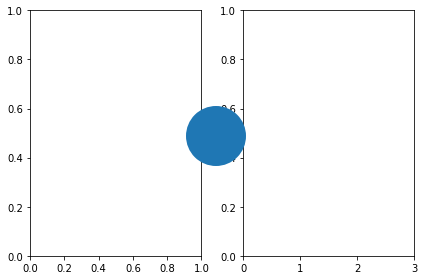

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(0, 3)

# What is the dpi?
print(fig.dpi)   # dots (aka pixel) per inch

# Calculate total width and height of the figure using dpi and dimensions
width = 6 * fig.dpi
height = 4 * fig.dpi

# Calculate (x, y) in the middle of the plot
x = width / 2
y = height / 2
print(x, y)

# Make sure to invoke plt.tight_layout()
# matplotlib does the cropping better than Jupyter
plt.tight_layout() 

# Draw a circle at (x, y) with radius 30
# Make sure to set transform=None
c = plt.Circle((x, y), 30, transform=None)
fig.add_artist(c)
# Save the figure to temp.png
fig.savefig("temp.png")

### Mix and match

- `ax.transData.transform((x, y))`: converts axes / data coords into raw pixel coordinates
- How to draw an arrow:
    `matplotlib.patches.FancyArrowPatch((<start point tuple>, <end point tuple>), transform=None, arrowstyle="<list of styles>")`:
    - arrowstyle="simple,head_width=10,head_length=10"

275.246875 150.5


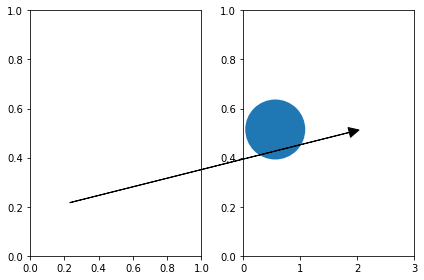

In [13]:
# GOAL: draw a visual circle at axes / data coords 0.5, 0.5 
# with raw co-ordinate radius 30 on right subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(0, 3)

# crop now (after .transform, we don't want to move anything!)
plt.tight_layout() 

x, y = ax2.transData.transform((0.5, 0.5))
print(x, y)
# Draw a circle at (x, y) with radius 30 and set transform to None
c = plt.Circle((x, y), 30, transform=None)
ax2.add_artist(c)

# GOAL: arrow from 0.2, 0.2 (left) to 2, 0.5 (right)
# Use axes / data coords from one subplot to another subplot
x1, y1 = ax1.transData.transform((0.2, 0.2))
x2, y2 = ax2.transData.transform((2, 0.5))
arrow = matplotlib.patches.FancyArrowPatch((x1, y1), (x2, y2), transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
fig.add_artist(arrow)

### Custom Scatter Plots with Angles

In [14]:
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


2 5 90
3 1 0
6 6 45
8 1 180


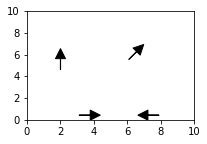

In [15]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for row in df.itertuples():
    print(row.x, row.y, row.a)
    # v1: draw a circle for each scatter point
    
    # x, y = ax.transData.transform((row.x, row.y))
    # c = plt.Circle((x,y), radius=10, transform=None)
    # ax.add_artist(c)
    
    # v2: draw an arrow for each scatter point (correct angle)
    x, y = ax.transData.transform((row.x, row.y))
    # Calculate angle: math.radians(row.a)
    a = math.radians(row.a)
    # Calculate end axes / data coords using 
    x_diff = math.cos(a) * 25
    y_diff = math.sin(a) * 25
    c = matplotlib.patches.FancyArrowPatch((x,y), (x+x_diff, y+y_diff),transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(c)

### Plot annotations

- Target plot:

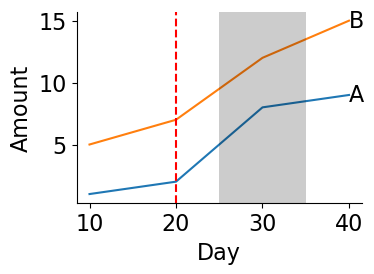

- `ax.text(<x>, <y>, <text>, ha=<someval>, va=<someval>)`
    - `ha`: horizontal alignment
    - `va`: vertical alignment
        - enables us to modify "anchor" of the text
    
#### More patches
- `plt.Line2D((<x1>, <x2>), (<y1>, <y2>)))`
- `plt.Rectangle((<x>, <y>), <width>, <height>)`

,A,B
10,1,5
20,2,7
30,8,12
40,9,15


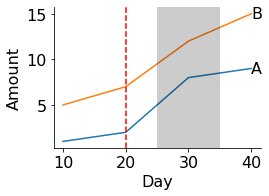

In [16]:
plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,3), legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()
# Enables us to control borders (aka spines)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. Replace legened with line labels
for col in df.columns:
    ax.text(df.index[-1], df[col].iat[-1], col, ha="left", va="center")

# 2. Draw a vertical line at x=20
p = plt.Line2D((20, 20), ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(p)

# 3. Highlight a region from x=25 to x=35
p = plt.Rectangle((25, 0), 10, ax.get_ylim()[1], color="k", zorder=50, alpha=0.2, linewidth=0)
ax.add_artist(p)

df